I will be looking at what Twitter users said about a violent clash that broke out in Charlottesville, that is, major key topics that they discussed. I am also interested in finding out their tweeting behavior as well, such as when they tweeted their message, who the influential Twitter users were, and who was most active in the conversation

In [4]:
%matplotlib inline 
import nltk
import string
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

tweets = pd.read_csv('aug15_sample.csv')

In [5]:
tweets.head()

,id,user_id,user_name,screen_name,user_statuses_count,user_favorites_count,friends_count,followers_count,user_location,user_description,...,created_at,is_retweet,retweeted_status_text,retweeted_status_id,quoted_status_text,quoted_status_id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,hashtags
0,897661668787982336,2912874772,KCR,kc_race,428,381,250,32,philly,Communications profesh. Giving everything majo...,...,2017-08-16 03:29:54,f,NaN,NaN,"""Charlottesville suspect was known as “the Naz...",8.975583e+17,NaN,NaN,NaN,NaN
1,897654901534228480,4840680143,Rory Hart,OpenHartnMinds,5544,3503,510,62,"Connecticut, USA","Educator, Coach, Ally, Activist",...,2017-08-16 03:03:00,f,NaN,NaN,NaN,NaN,OpenHartnMinds,8.976548e+17,4.840680e+09,NaN
2,897659748597870592,2884196456,Lee Valentine Smith,leevsmith,9425,49365,5168,6726,"NY, London, Paris, Munich.","Writer-artist-activist-contrarian. No debates,...",...,2017-08-16 03:22:16,f,NaN,NaN,"""WATCH: WH Chief John Kelly reacts to Trump's ...",8.976497e+17,NaN,NaN,NaN,NaN
3,897660496656179202,733618527282814976,Karabo J.R Ramasodi,kjr_inkguy,3374,805,108,45,"Pretoria, South Africa",|Events Guy|\n●Both Problem and Situation●\n♤T...,...,2017-08-16 03:25:14,f,NaN,NaN,"""#NEW: #Charlottesville murder suspect can't a...",8.971070e+17,NaN,NaN,NaN,NaN
4,897642311903055872,4388881763,ProudTrumpwoman,pmswolfy,120434,61111,805,2263,"Salem, VA","Wife, mother, and teacher never been involved ...",...,2017-08-16 02:12:59,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets['full_text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)

rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

rslt = rslt.iloc[1:]

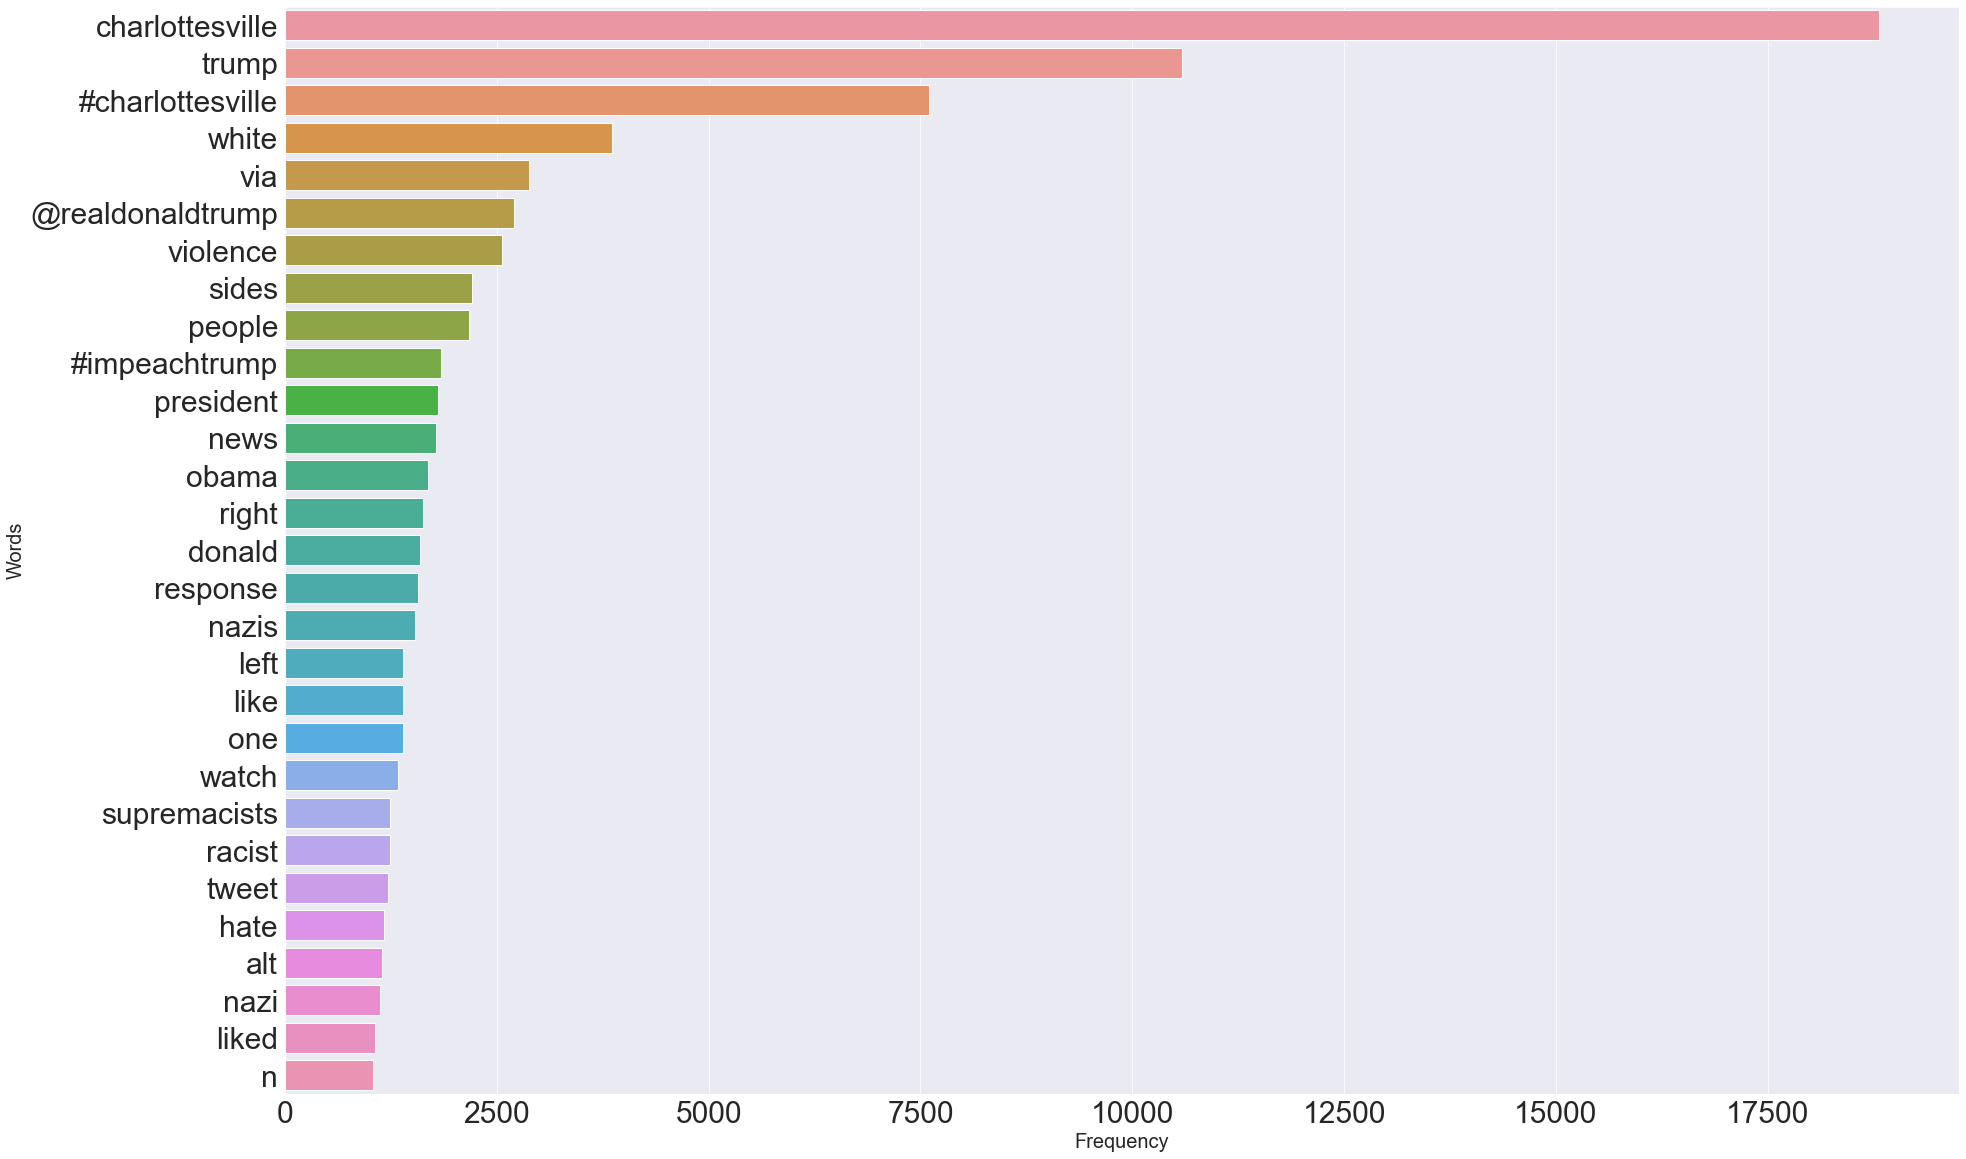

In [7]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x='Frequency', data=rslt)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

In [8]:
#hashtags = hashtags[~hashtags.isnull()]
tags = (tweets['hashtags']
           .str.lower()
           .str.cat(sep=' ')
           .split()
)

hashtgs = pd.DataFrame(Counter(tags).most_common(top_N),
                    columns=['Hashtags', 'Frequency']).set_index('Hashtags')
hashtgs = hashtgs.iloc[1:]
hashtgs

,Frequency
Hashtags,
"""impeachtrump""",1721
"""trump""",920
"""maga""",393
"""resist""",262
"""antifa""",234
"""news""",229
"""altright""",162
"""impeach""",154
"""impeach45""",151


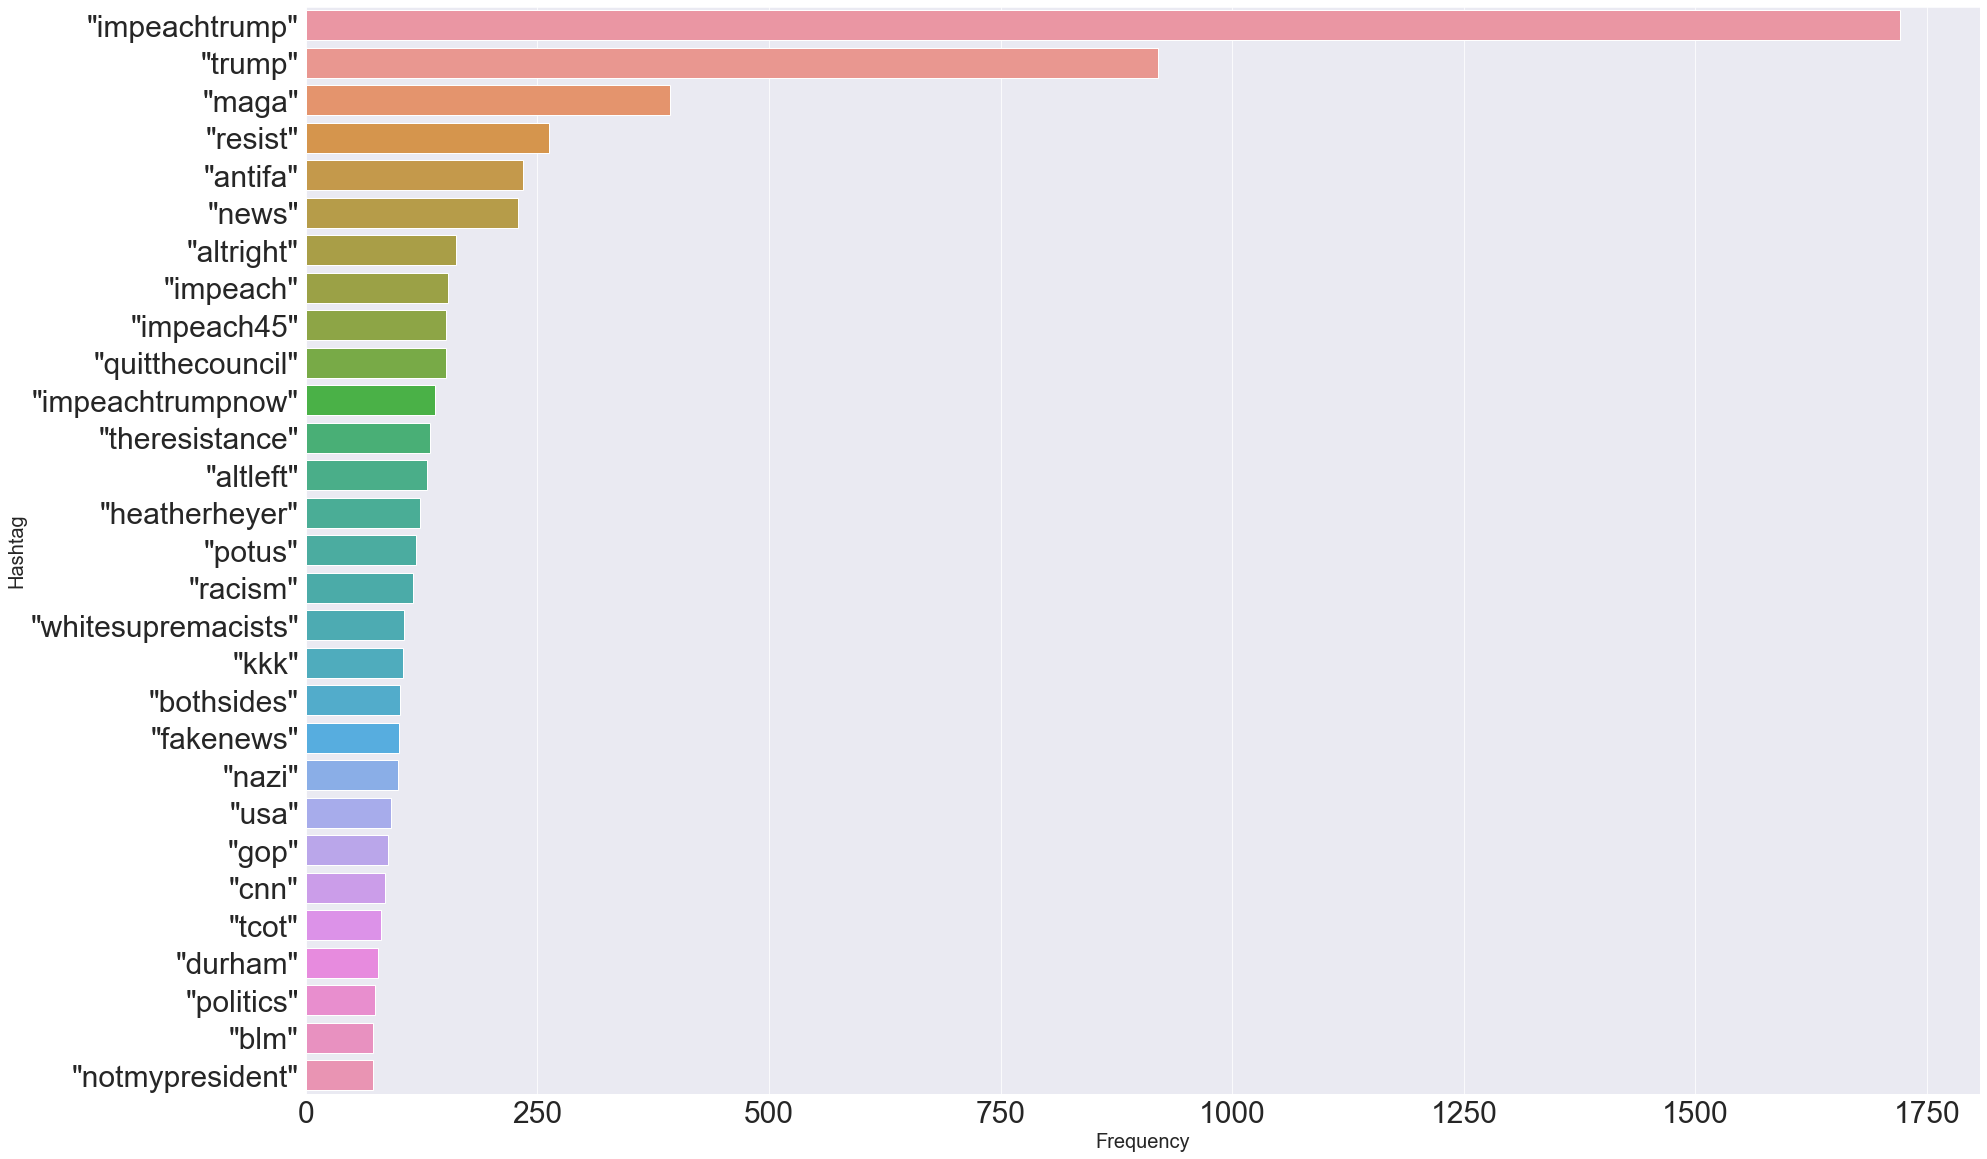

In [9]:
sns.set_style("darkgrid")
ax = sns.barplot(y=hashtgs.index, x='Frequency', data=hashtgs)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Hashtag",fontsize=20)
ax.tick_params(labelsize=30)

In [10]:
hashtgs

,Frequency
Hashtags,
"""impeachtrump""",1721
"""trump""",920
"""maga""",393
"""resist""",262
"""antifa""",234
"""news""",229
"""altright""",162
"""impeach""",154
"""impeach45""",151


In [11]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [12]:
tweets = tweets.set_index('created_at')

In [13]:
df = tweets[['id']]
tweet_volume = df.resample('10min').count()

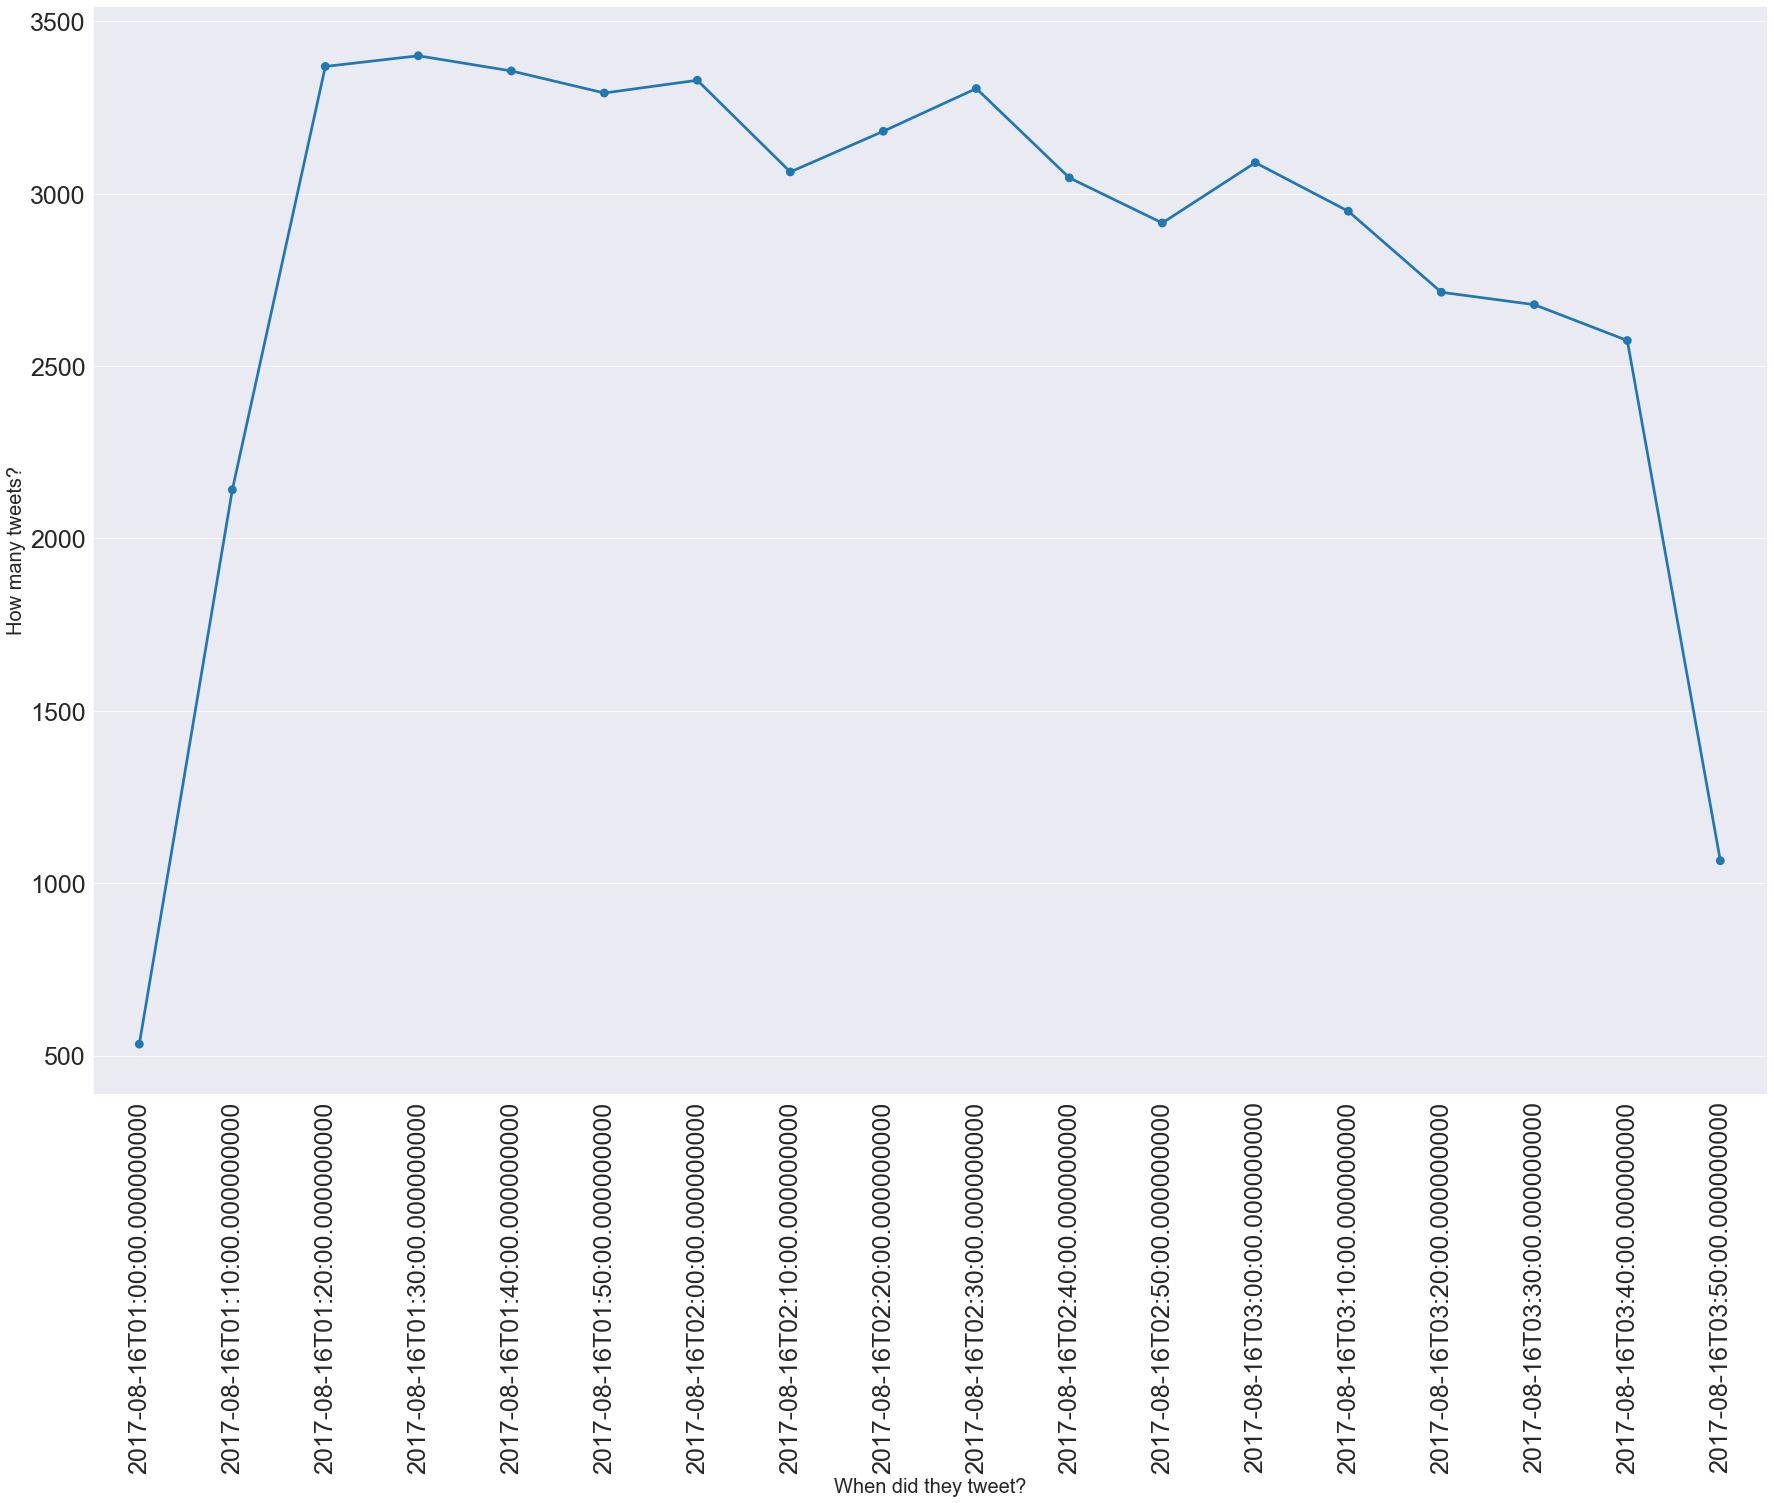

In [14]:
ax = sns.pointplot(x=tweet_volume.index, y='id', data=tweet_volume)
ax.set_xlabel("When did they tweet?",fontsize=20)
ax.set_ylabel("How many tweets?",fontsize=20)

ax.tick_params(labelsize=25)

for item in ax.get_xticklabels():
    item.set_rotation(90)

In [15]:
influential = tweets[['user_name', 'followers_count']]

In [16]:
influential = influential.sort_values('followers_count', ascending=False)

In [17]:
influential.groupby('user_name').first().sort_values(by='followers_count', ascending=False)[:10]

,followers_count
user_name,
CNN,37067971
Reuters Top News,18494616
Fox News,15636365
TIME,14518616
ABC News,11495209
Washington Post,10908284
HuffPost,10606070
Mashable,9205958
People,7817745


In [18]:
tweets['screen_name'].value_counts()[:10]

socalhomes411      119
corrigan_david     116
ArisaRoyal         106
BinkyDLA            81
Rightingtheship     79
Foods4u             69
partermaytr2        47
The1stLadyLove      42
GrasslandDesign     42
ToBeSafeNSound      40
Name: screen_name, dtype: int64

In [19]:
# clustering algorithms 
# from http://ahmedbesbes.com/how-to-mine-newsfeed-data-and-extract-interactive-insights-in-python.html

pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter

def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', u'amp', u'https',
                                                u'via', u"'re"], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Error as e:
        print(e)

In [20]:
tweets['tokens'] = tweets['full_text'].map(tokenizer)

In [21]:
for full_text, tokens in zip(tweets['full_text'].head(5), tweets['tokens'].head(5)):
    print('full text:', full_text)
    print('tokens:', tokens)
    print() 

full text: It's almost as if people are exactly who they say they are https://t.co/MnWFXZd9c3
tokens: ['almost', 'people', 'exactly', 'say', '//t.co/mnwfxzd9c3']

full text: @Slate Conservative media: Yes, Trump's response to Charlottesville was bad, but what about Obama? https://t.co/jjINXL5Qp0 via @slate
tokens: ['slate', 'conservative', 'media', 'yes', 'trump', 'response', 'charlottesville', 'bad', 'obama', '//t.co/jjinxl5qp0', 'slate']

full text: 👀 https://t.co/qeyzYeblwu
tokens: ['//t.co/qeyzyeblwu']

full text: 😂 😂 😂 Karma really isn't wasting time.. https://t.co/JYRqf6vlSX
tokens: ['karma', 'really', 'wasting', 'time..', '//t.co/jyrqf6vlsx']

full text: After Charlottesville, Black Lives Matter Issues New Demand - https://t.co/Vuw3IvrhL2
tokens: ['charlottesville', 'black', 'lives', 'matter', 'issues', 'new', 'demand', '//t.co/vuw3ivrhl2']



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider
# TfidfVectorizer preprocesses the descriptions using the tokenizer we defined above

vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(tweets['full_text']))

In [24]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

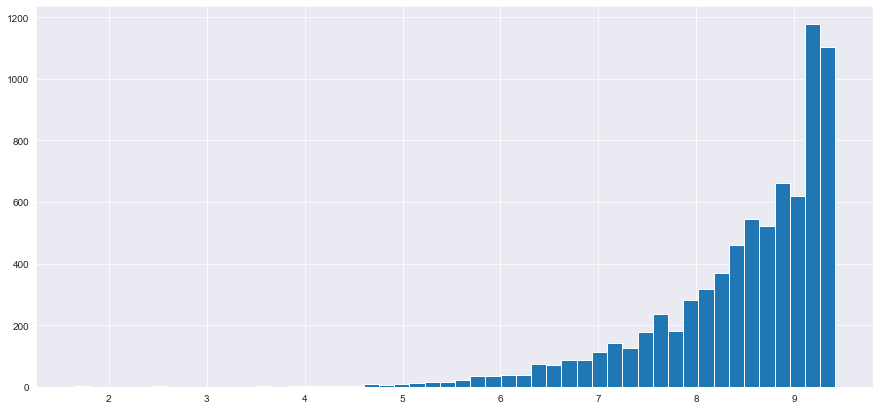

In [26]:
tfidf.tfidf.hist(bins=50, figsize=(15,7))

In [27]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

,tfidf
snowflake,9.421903
drove car,9.421903
durham resist,9.421903
lisamurkowski,9.421903
literally defended,9.421903
prosecute,9.421903
duck,9.421903
proper,9.421903
web,9.421903
begins,9.421903


In [28]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [29]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print() 

Cluster 0:
anthem | supremacist charlottesville | death | heather heyer | heyer | responsible | heather | white supremacist | supremacist | white | 

Cluster 1:
fucked | taking | knew | job | supremacists unequivocal | gives white | unequivocal boost | trump gives | unequivocal | boost | 

Cluster 2:
forgive | truly bad | democratic | bad people | thinks | truly | wo | evil | resist | bad | 

Cluster 3:
charlottesville horrifying | news documentary | documentary charlottesville | horrifying | documentary | vice news | vice | news | charlottesville | esquire | 

Cluster 4:
pure | class | miss | truly | white house | house | white | 米国社会の分断：差別主義、トランプ政権で勢い\n 大学生\n | false equivalency | false | 

Cluster 5:
usagsessions | baltimore | destruction | property | ferguson | simple | order | law | matter | good | 

Cluster 6:
even fox | turns | pos | trump doubles | doubles | wh | disgusting | even | response charlottesville | fox | 

Cluster 7:
charlottesville | trump | realdonaldtrump | impeac